In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [3]:
import yfinance as yf
data = yf.download('NVDA', start='2019-01-01', end='2024-9-30')
print(data)
df=pd.DataFrame(data)
df.shape
df.to_csv('nvidia.csv')

[*********************100%***********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-01-02    3.266000    3.462000    3.251250    3.405500    3.378322   
2019-01-03    3.344750    3.379000    3.192250    3.199750    3.174214   
2019-01-04    3.273500    3.443250    3.242500    3.404750    3.377579   
2019-01-07    3.462500    3.622250    3.410750    3.585000    3.556391   
2019-01-08    3.667250    3.669500    3.422500    3.495750    3.467852   
...                ...         ...         ...         ...         ...   
2024-09-23  116.550003  116.989998  114.860001  116.260002  116.260002   
2024-09-24  116.519997  121.800003  115.379997  120.870003  120.870003   
2024-09-25  122.019997  124.940002  121.610001  123.510002  123.510002   
2024-09-26  126.800003  127.669998  121.800003  124.040001  124.040001   
2024-09-27  123.970001  124.029999  119.260002  121.400002  121.400002   

               Volume  
Date         

In [4]:
dff=pd.read_csv('nvidia.csv')

In [5]:
dff

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,3.266000,3.462000,3.251250,3.405500,3.378322,508752000
1,2019-01-03,3.344750,3.379000,3.192250,3.199750,3.174214,705552000
2,2019-01-04,3.273500,3.443250,3.242500,3.404750,3.377579,585620000
3,2019-01-07,3.462500,3.622250,3.410750,3.585000,3.556391,709160000
4,2019-01-08,3.667250,3.669500,3.422500,3.495750,3.467852,786016000
...,...,...,...,...,...,...,...
1440,2024-09-23,116.550003,116.989998,114.860001,116.260002,116.260002,206228500
1441,2024-09-24,116.519997,121.800003,115.379997,120.870003,120.870003,354966800
1442,2024-09-25,122.019997,124.940002,121.610001,123.510002,123.510002,284692900
1443,2024-09-26,126.800003,127.669998,121.800003,124.040001,124.040001,302582900


In [6]:
# Taking only close values
df=dff.iloc[:,3]
df.head()

0    3.25125
1    3.19225
2    3.24250
3    3.41075
4    3.42250
Name: Low, dtype: float64

In [7]:
df.shape

(1445,)

Text(0.5, 1.0, 'NVDA stock prices')

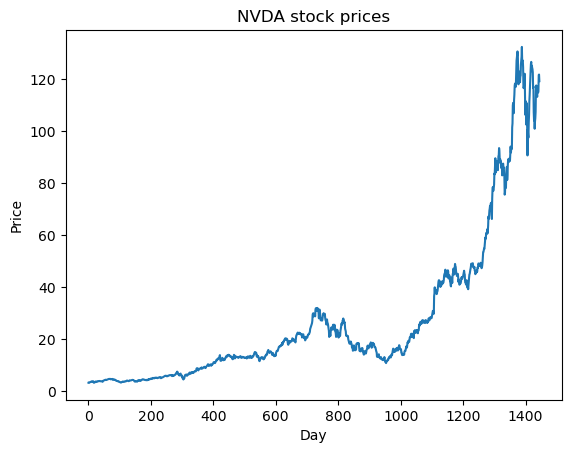

In [8]:
plt.plot(df)
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('NVDA stock prices')

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df=scaler.fit_transform(np.array(df).reshape(-1, 1))
df

array([[4.56558410e-04],
       [0.00000000e+00],
       [3.88848789e-04],
       ...,
       [9.16349254e-01],
       [9.17819545e-01],
       [8.98164317e-01]])

In [10]:
## We will take train entries till 1000(total 1445 data points)
df=pd.DataFrame(df)
train=df.iloc[:1000,:]
print(train)
test=df.iloc[1000:,:]
print(test)

            0
0    0.000457
1    0.000000
2    0.000389
3    0.001691
4    0.001782
..        ...
995  0.112350
996  0.110098
997  0.104527
998  0.102283
999  0.100232

[1000 rows x 1 columns]
             0
1000  0.097965
1001  0.099899
1002  0.090459
1003  0.090466
1004  0.084067
...        ...
1440  0.864116
1441  0.868140
1442  0.916349
1443  0.917820
1444  0.898164

[445 rows x 1 columns]


In [11]:
def create_dataset(dataset,timestep=1):
    x=[]
    y=[]
    for i in range(len(dataset)-timestep):
        x.append(dataset.iloc[i:i+timestep,0])
        y.append(dataset.iloc[i+timestep,:])
    return np.array(x),np.array(y)

In [12]:
x_train,y_train=create_dataset(train,100)
x_test,y_test=create_dataset(test,100)
print(f'size of x_train={x_train.shape}\nsize of x_test={x_test.shape}\nsize of y_train={y_train.shape}\nsize of y_test={y_test.shape}')

size of x_train=(900, 100)
size of x_test=(345, 100)
size of y_train=(900, 1)
size of y_test=(345, 1)


The code snippet reshapes the input data X_train and X_test to a 3D shape suitable for training an LSTM (Long Short-Term Memory) network. LSTM models require input data to have a specific shape: [samples, time steps, features].

Here's a breakdown of what each dimension represents:

Samples (X_train.shape[0], X_test.shape[0]):

This is the number of data points or sequences in your dataset. Each data point is considered a sample.
Time Steps (X_train.shape[1], X_test.shape[1]):

This represents the number of time steps in each sample. For each sequence, this is how many time points you want the LSTM to look at.
Features (1):

This is the number of features (variables) at each time step. Since you are reshaping with 1 here, it implies you have a single feature (or dimension) per time step. If you had more features (e.g., multiple measurements at each time step), you would adjust this accordingly.

In [13]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [15]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))

# return_sequences=True: 
# This ensures that the LSTM layer returns the full sequence of outputs 
# for each time step, rather than just the output at the final time step. 

model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

/Users/ishankanodia/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


###### return_sequences=True
This ensures that the LSTM layer returns the full sequence of outputs for each time step, rather than just the output at the final time step. This is useful when you are stacking multiple LSTM layers.

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

##### verbose Options:

verbose=0: No output is shown during training.

verbose=1: A progress bar is shown during training, along with other metrics (like loss and accuracy) for each epoch.

verbose=2: One line is printed per epoch, showing the training metrics (e.g., loss, accuracy) without a progress bar.

In [17]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0039 - val_loss: 0.0486
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 4.1787e-04 - val_loss: 0.0035
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 2.0954e-04 - val_loss: 0.0130
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 1.6314e-04 - val_loss: 0.0120
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 1.7004e-04 - val_loss: 0.0149
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 1.6702e-04 - val_loss: 0.0167
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 1.7523e-04 - val_loss: 0.0180
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 1.5900e-04 - val_loss: 0.0127
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 1.3200e-04 - val_loss: 0.0150
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 1.2377e-04 - val_loss: 0.0181
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 1.3866e-04 - val_loss: 0.0122
Epoch 12/100

In [18]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [19]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [20]:
test_predict

array([[ 27.988972],
       [ 28.07045 ],
       [ 28.42957 ],
       [ 29.091644],
       [ 29.907753],
       [ 30.50538 ],
       [ 30.771526],
       [ 30.540487],
       [ 32.039787],
       [ 34.552868],
       [ 37.54762 ],
       [ 39.24376 ],
       [ 39.717304],
       [ 39.61309 ],
       [ 39.130764],
       [ 38.36824 ],
       [ 37.39265 ],
       [ 36.62333 ],
       [ 36.55449 ],
       [ 36.92816 ],
       [ 37.769306],
       [ 38.890446],
       [ 40.344997],
       [ 41.720215],
       [ 42.597733],
       [ 42.69294 ],
       [ 42.35259 ],
       [ 41.811234],
       [ 40.667385],
       [ 39.630684],
       [ 39.041607],
       [ 38.911964],
       [ 39.366142],
       [ 40.24346 ],
       [ 41.036568],
       [ 41.26922 ],
       [ 41.395863],
       [ 41.28622 ],
       [ 41.20274 ],
       [ 41.401955],
       [ 42.266483],
       [ 43.409073],
       [ 44.354637],
       [ 45.00978 ],
       [ 45.632294],
       [ 45.434708],
       [ 44.44457 ],
       [ 43.3

In [21]:
from sklearn.metrics import mean_squared_error
import math

In [22]:
print(math.sqrt(mean_squared_error(y_train, train_predict)))
print(math.sqrt(mean_squared_error(y_test, test_predict)))

15.253496122636577
70.96771209886435


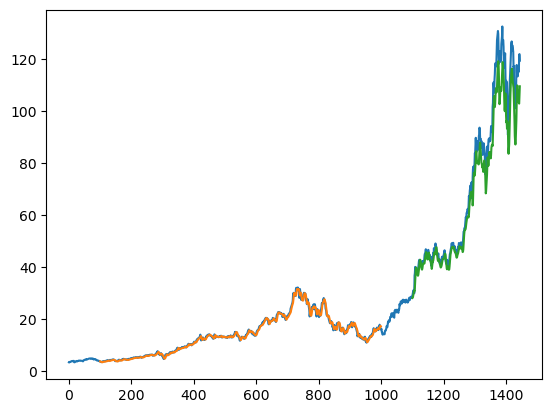

In [23]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2):len(df), :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [24]:
last_day=dff.iloc[-100:,3]
last_day

1345     89.011002
1346     89.419998
1347     88.231003
1348     89.226997
1349     88.528999
           ...    
1440    114.860001
1441    115.379997
1442    121.610001
1443    121.800003
1444    119.260002
Name: Low, Length: 100, dtype: float64

In [25]:
last_day=scaler.fit_transform(np.array(last_day).reshape(-1, 1))
last_day

array([[0.01765143],
       [0.02690705],
       [0.        ],
       [0.02253943],
       [0.00674368],
       [0.01590883],
       [0.07621799],
       [0.13288363],
       [0.08090243],
       [0.11788002],
       [0.11199615],
       [0.11355763],
       [0.30073084],
       [0.33422342],
       [0.48998626],
       [0.51302362],
       [0.48500761],
       [0.42338595],
       [0.53796189],
       [0.58417249],
       [0.66163531],
       [0.68091607],
       [0.67417238],
       [0.65127073],
       [0.69042065],
       [0.77709386],
       [0.88096596],
       [0.90721693],
       [0.93573069],
       [0.96085008],
       [0.93437294],
       [0.81624395],
       [0.67457967],
       [0.70354613],
       [0.77777273],
       [0.78501435],
       [0.78116728],
       [0.69245745],
       [0.74224353],
       [0.7497115 ],
       [0.84747339],
       [0.87825029],
       [0.91468454],
       [1.        ],
       [0.87847664],
       [0.88232371],
       [0.88141849],
       [0.822

In [26]:
last_day=last_day.reshape(1,100,1)
ans=model.predict(last_day)
ans=scaler.inverse_transform(ans)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [27]:
ans=ans[0][0]

In [28]:
print(f'The predicted price of next day out of the dataset will be \"{ans}\".')

The predicted price of next day out of the dataset will be "119.77243041992188".
